<a href="https://colab.research.google.com/github/jorgefpont/Coursera-ML-class/blob/master/ML_Ex2_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Exercise 2, Part 1

---



In [2]:
# load data file from my github repo, ex2data1.txt
url = 'https://raw.githubusercontent.com/jorgefpont/Coursera-ML-class/master/machine-learning-ex2/ex2/ex2data1.txt'

# load file into pandas data frame
data = pd.read_csv(url, header = None)
data.columns = ["Exam 1", "Exam 2", "Admitted"]
# separate X (features) and y ()
X = data.iloc[:,:-1] # read all columns except the last
y = data.iloc[:,-1] # read the last column
m = len(y) # number of training examples

# explore file
print("type data = ", type(data))
print("type X = ", type(X))
print("type y = ", type(y))
print()

print(data.head(),"\n")
print(data.info(),"\n")
print(data.describe())

type data =  <class 'pandas.core.frame.DataFrame'>
type X =  <class 'pandas.core.frame.DataFrame'>
type y =  <class 'pandas.core.series.Series'>

      Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Exam 1      100 non-null float64
Exam 2      100 non-null float64
Admitted    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB
None 

           Exam 1      Exam 2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


Plot the data

---


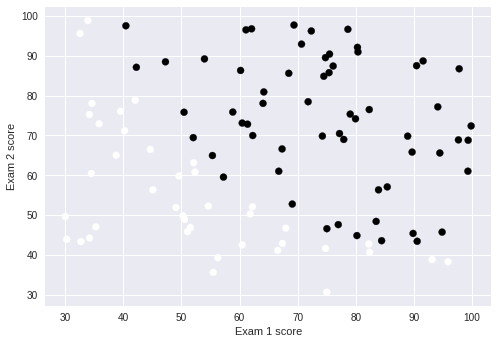

None
<function show at 0x7f442c3c7620>


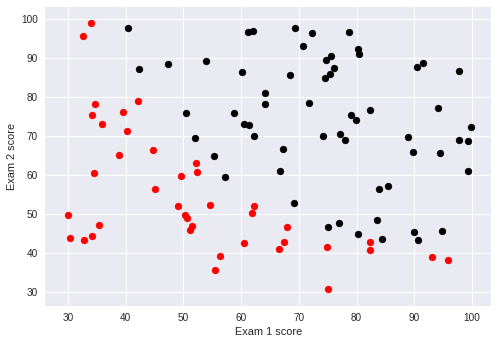

In [3]:
# Plot the data

data_array = np.asarray(data)
# c = sets the color, 0=white, 1=black -- clever ...
# this does not separate the data
plt.scatter(data_array[:,0], data_array[:,1], c=data_array[:,2])
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
print(plt.show())

# another way
# using boolean indexing
# not sure why I have to convert to np arry before plotting
admitted = data[data['Admitted'] == 1]
admitted = np.asarray(admitted)
notAdmitted = data[data['Admitted'] == 0]
notAdmitted = np.asarray(notAdmitted)
plt.scatter(admitted[:,0], admitted[:,1], color='black', label = 'Admitted')
plt.scatter(notAdmitted[:,0], notAdmitted[:,1], color='red', label = 'Not Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
print(plt.show)


In [0]:
# sigmoid function
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

In [0]:
# test sigmoid
#zTest=np.arange(-10,12, 2)
#print(zTest)
#print(sigmoid(zTest))

#ztTest=np.arange(-10,12,2).reshape(11,1)
#print(ztTest)
#print(sigmoid(ztTest))

#zmTest=np.arange(-10,10,2).reshape(5,2)
#print(zmTest)
#print(sigmoid(zmTest))

#plt.plot(zTest,sigmoid(zTest))

In [0]:
def costFunction(theta, X, y):

  '''
  Compute cost and gradient for logistic regression
  J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
  parameter for logistic regression and the gradient of the cost
  w.r.t. to the parameters.
  
  Compute the cost of a particular choice of theta.
  You should set J to the cost.
  Compute the partial derivatives and set grad to the partial
  derivatives of the cost w.r.t. each parameter in theta
  
  Return J and grad
  '''

  # Initialize some useful values
  m = y.shape[0] # number of training examples
  mt = theta.shape[0]
  #nt = theta.shape[1]
  grad = np.zeros((mt, 1))
  
  #z = np.multiply(X, theta)
  z = X @ theta
  h = sigmoid(z)
  
  J = (1/m) * ( \
      (np.transpose(-y) @ np.log(h)) - \
      (np.transpose(1-y) @ np.log(1-h))  )
  
  grad = (1/m)* ( \
      (np.transpose(X) @ np.subtract(h, y)))
  
  J = np.asscalar(J)
  #grad = np.asscalar(grad)
  
  return J, grad
  
  

In [7]:
# test costFunction
# =================

m, n = X.shape

# add column of ones to X
X = np.hstack((np.ones((m,1)), X))

# convert y into a propper np vector
y = y[:, np.newaxis]

# intialize theta with zeros and add theta_zero
theta = np.zeros((n+1,1))

J, grad = costFunction(theta, X, y)
print(J)
print(grad)



0.6931471805599453
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [23]:
'''
Instead of matlab fminunc, 
use fmin_tnc from scipy library.
'''

import scipy.optimize as opt

temp = opt.fmin_tnc(func = costFunction, 
                    x0 = theta.flatten(), 
                    args = (X, y.flatten()))
#the output of above function is a tuple whose first element 
#contains the optimized values of theta
thetaFit = temp[0]
print(temp)
print(thetaFit)

# test classifier
tst = sigmoid( (np.array([[1,50,50],[1,85,85],[1,80,42],[1,75,45]])) @ thetaFit.T )
print(tst)

(array([-25.16131865,   0.20623159,   0.20147149]), 36, 0)
[-25.16131865   0.20623159   0.20147149]
[0.00835782 0.99992466 0.4499212  0.34802484]


<function show at 0x7f442c3c7620>


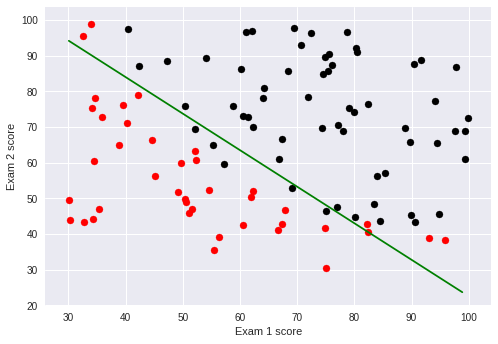

In [9]:
# plot decisison boundary
# y = (-1/theta[2]) * (theta[0] + theta[1] * X)
# not sure I got this ...
xBoundary = [np.min(X[:,1]), np.max(X[:,2])]
yBoundary =  -1/thetaFit[2] * (
    thetaFit[0] + np.dot(thetaFit[1],xBoundary))
boundary = plt.plot(xBoundary, yBoundary, c='green')

# from above, the data scatter
admitted = data[data['Admitted'] == 1]
admitted = np.asarray(admitted)
notAdmitted = data[data['Admitted'] == 0]
notAdmitted = np.asarray(notAdmitted)
plt.scatter(admitted[:,0], admitted[:,1], color='black', label = 'Admitted')
plt.scatter(notAdmitted[:,0], notAdmitted[:,1], color='red', label = 'Not Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
print(plt.show)

In [30]:
# use scikit-learn to get the thetas
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs')
clf.fit(X, y.flatten())
print(clf)
print(clf.coef_)  # get thethetas

# seems like there is no way to get the theta vector from the function
# see p 23 of Rashcka for weird conversion

tst = clf.predict(np.array([1,50,50]).reshape(1, -1))
print(tst)

tst = clf.predict(np.array([[1,50,50],[1,85,85],[1,80,42],[1,75,45]]))
print(tst)

print(clf.score(X,y)) # accuracy



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
[[-4.19885865e-08  2.05354461e-01  2.00583554e-01]]
[0]
[0 1 0 0]
0.89


### Exercise 2, Part 2

---

In [0]:
# load data file from my github repo, ex2data1.txt
url = 'https://raw.githubusercontent.com/jorgefpont/Coursera-ML-class/master/machine-learning-ex2/ex2/ex2data2.txt'